In [1]:
!pip install torch torchvision

Defaulting to user installation because normal site-packages is not writeable


In [2]:
# Import necessary libraries
import torch
from torchvision import transforms
from PIL import Image
import matplotlib.pyplot as plt

In [3]:
# Path to the image
image_path = r"C:\Users\dell\Downloads\image\sp2.jpg"

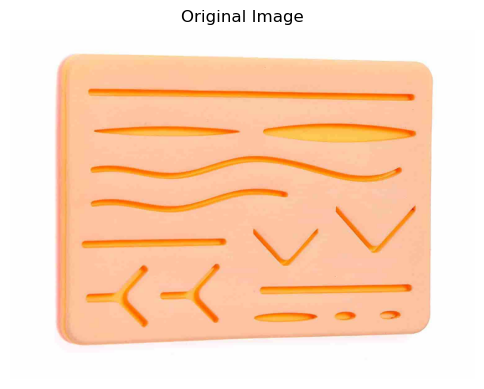

In [4]:
# Load the image
image = Image.open(image_path)

# Display the original image
plt.figure(figsize=(6,6))
plt.imshow(image)
plt.title("Original Image")
plt.axis('off')
plt.show()

In [5]:
# Define a crop size (e.g., crop a small area from the center)
left = 10  # Left crop boundary
top = 10  # Top crop boundary
right = image.width - 10  # Right crop boundary (don't crop too much)
bottom = image.height - 10  # Bottom crop boundary (don't crop too much)

# Perform crop operation (mild crop)
cropped_image = image.crop((left, top, right, bottom))


In [6]:
# Resize the image (ensure resizing is moderate and retains the aspect ratio)
resize_transform = transforms.Resize((256, 256))  # You can adjust size as needed
resized_image = resize_transform(cropped_image)

In [7]:
# Adjust brightness (moderate adjustment)
brightness_transform = transforms.ColorJitter(brightness=0.2)
brightened_image = brightness_transform(resized_image)

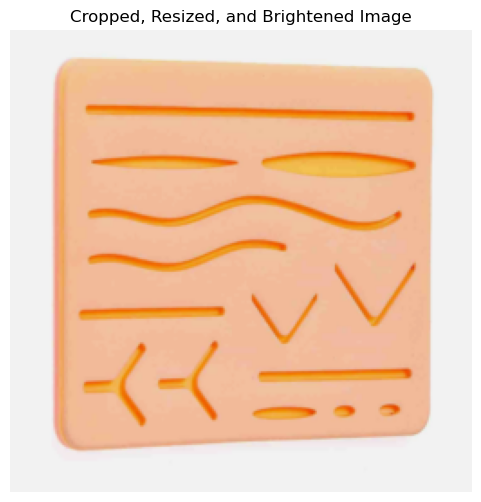

In [8]:
# Display cropped, resized, and adjusted image
plt.figure(figsize=(6,6))
plt.imshow(brightened_image)
plt.title("Cropped, Resized, and Brightened Image")
plt.axis('off')
plt.show()


In [9]:
!pip install kornia


Defaulting to user installation because normal site-packages is not writeable


In [10]:
# Import libraries
import torch
import torchvision  
import torchvision.transforms as T
import kornia as K
import cv2
import matplotlib.pyplot as plt

# Helper function to display images
def imshow(input_tensor):
    grid_img = torchvision.utils.make_grid(input_tensor, nrow=1, padding=5)
    plt.figure(figsize=(10, 10))
    plt.imshow(grid_img.permute(1, 2, 0).cpu().numpy())
    plt.axis('off')
    plt.show()


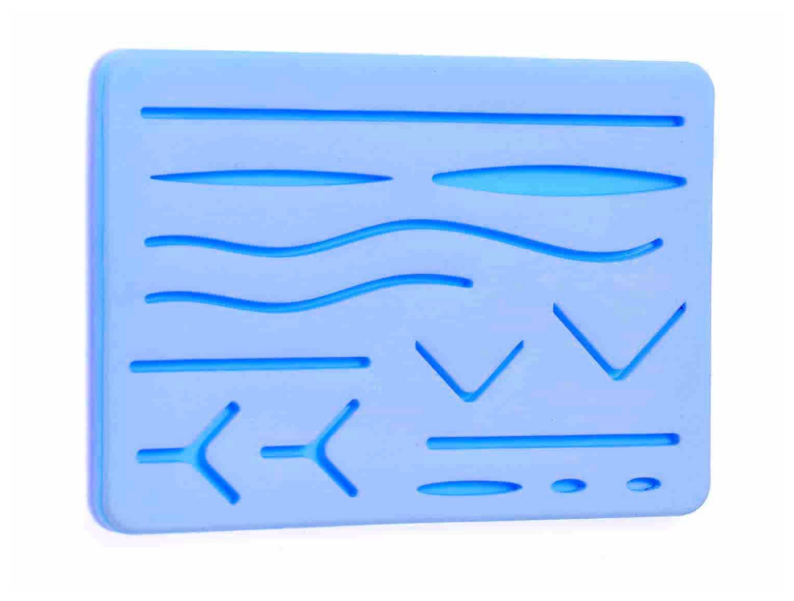

In [11]:
# Replace the path with the path to your image
image_path = "C:/Users/dell/Downloads/image/sp2.jpg"
img = cv2.imread(image_path, cv2.IMREAD_COLOR)  # Load the image
img_tensor = K.utils.image_to_tensor(img) / 255.0  # Convert to tensor and normalize
img_tensor = img_tensor.unsqueeze(0)  # Add batch dimension
imshow(img_tensor)


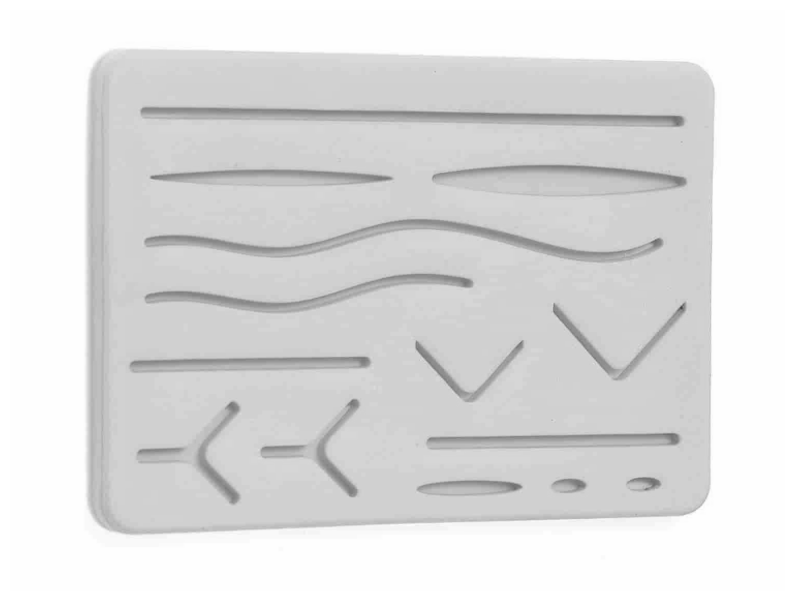

In [12]:
# Convert to grayscale
img_gray = K.color.rgb_to_grayscale(K.color.bgr_to_rgb(img_tensor))
imshow(img_gray)


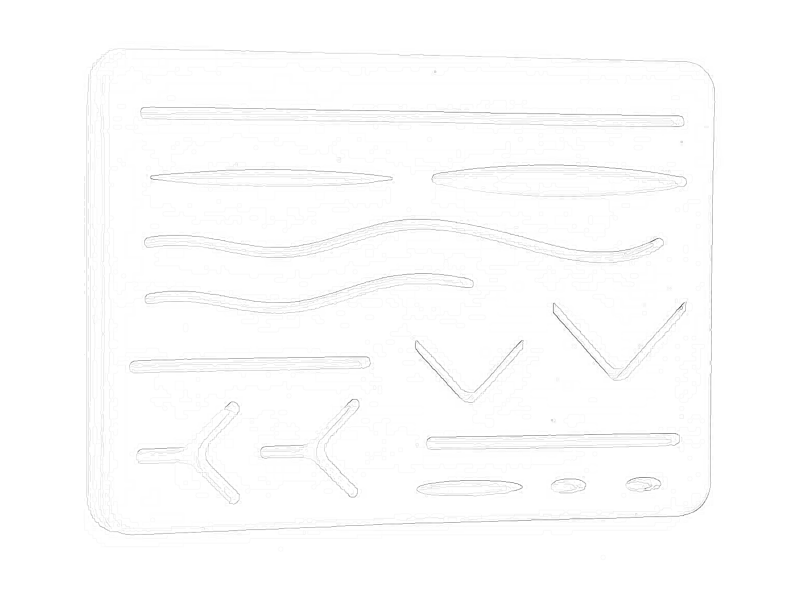

In [13]:
# Apply Canny edge detection
edges_canny = K.filters.canny(img_gray, low_threshold=0.1, high_threshold=0.2)
imshow(1 - edges_canny[0].clamp(0, 1))  # Display edges; clamp to keep values within range


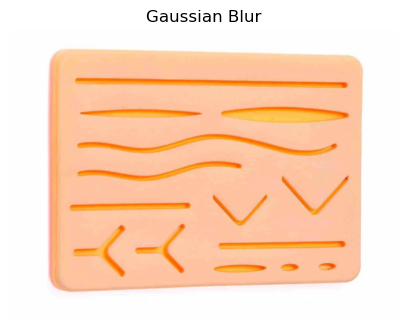

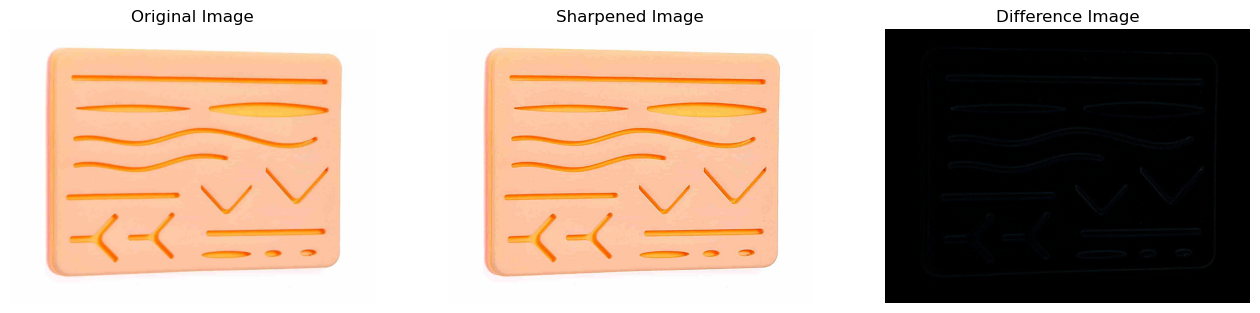

In [14]:
import torch
import kornia as K
import cv2
import matplotlib.pyplot as plt

# Helper function to display images
def imshow(input_tensor, title="Image"):
    plt.figure(figsize=(5, 5))
    plt.imshow(input_tensor.squeeze().permute(1, 2, 0).cpu().numpy(), cmap="gray")
    plt.axis("off")
    plt.title(title)
    plt.show()

# Load and prepare the image
img_path = "C:\\Users\\dell\\Downloads\\image\\sp2.jpg"
img = cv2.imread(img_path, cv2.IMREAD_COLOR)
img_tensor = K.utils.image_to_tensor(img).float() / 255.0  # Convert to tensor and normalize
img_tensor = K.color.bgr_to_rgb(img_tensor).unsqueeze(0)  # Convert BGR to RGB and add batch dim

# Step 1: Apply Gaussian Blur
kernel_size = (5, 5)  # Size of the kernel (adjust as needed)
sigma = (1.5, 1.5)    # Standard deviation (adjust for more or less blur)
img_blur = K.filters.gaussian_blur2d(img_tensor, kernel_size, sigma)
imshow(img_blur, "Gaussian Blur")

# Step 2: Apply Sharpening Filter with Unsharp Mask
sharpen_filter = K.filters.UnsharpMask((9, 9), (2.5, 2.5))
img_sharp = sharpen_filter(img_tensor)
difference = (img_sharp - img_tensor).abs()  # Difference between original and sharpened

# Display the images
fig, axs = plt.subplots(1, 3, figsize=(16, 10))
axs = axs.ravel()

axs[0].axis("off")
axs[0].set_title("Original Image")
axs[0].imshow(img_tensor.squeeze().permute(1, 2, 0).cpu().numpy())

axs[1].axis("off")
axs[1].set_title("Sharpened Image")
axs[1].imshow(img_sharp.squeeze().permute(1, 2, 0).cpu().numpy())

axs[2].axis("off")
axs[2].set_title("Difference Image")
axs[2].imshow(difference.squeeze().permute(1, 2, 0).cpu().numpy())

plt.show()


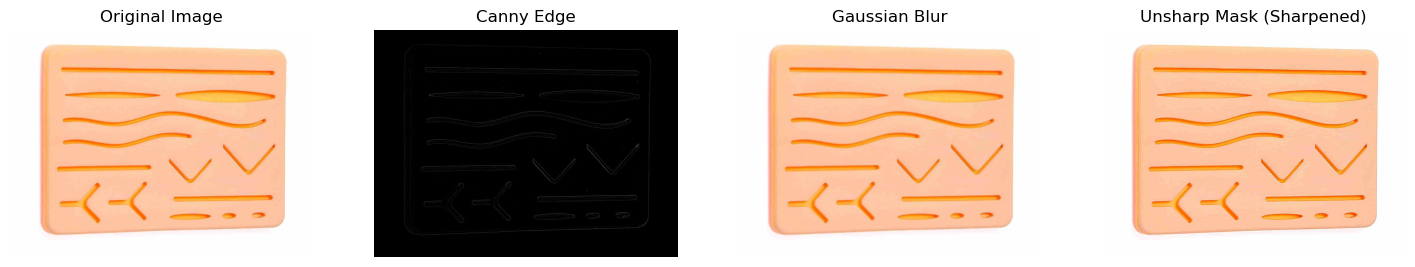

In [15]:
import torch
import kornia as K
import matplotlib.pyplot as plt

# Assuming 'img_tensor' is already loaded and preprocessed

# Helper function to display images
def display_comparisons(original, *filtered_images, titles):
    fig, axs = plt.subplots(1, len(filtered_images) + 1, figsize=(18, 5))
    axs[0].imshow(original.permute(1, 2, 0))
    axs[0].set_title("Original Image")
    axs[0].axis("off")
    
    for i, img in enumerate(filtered_images):
        axs[i+1].imshow(img.permute(1, 2, 0), cmap="gray" if i == 0 else None)  # Grayscale for Canny edges
        axs[i+1].set_title(titles[i])
        axs[i+1].axis("off")
    
    plt.show()

# Step 1: Apply Canny Edge Detection
canny_edges, _ = K.filters.canny(img_tensor, low_threshold=0.1, high_threshold=0.2)  # Extract edges only

# Step 2: Apply Gaussian Blur
kernel_size = (5, 5)
sigma = (1.5, 1.5)
gaussian_blur = K.filters.gaussian_blur2d(img_tensor, kernel_size, sigma)

# Step 3: Apply Unsharp Mask (for sharpening)
unsharp = K.filters.UnsharpMask((9, 9), (2.5, 2.5))
sharpened = unsharp(img_tensor)

# Display comparisons
display_comparisons(
    img_tensor.squeeze(0), 
    canny_edges.squeeze(0), 
    gaussian_blur.squeeze(0), 
    sharpened.squeeze(0),
    titles=["Canny Edge", "Gaussian Blur", "Unsharp Mask (Sharpened)"]
)


In [79]:
# Convert the Gaussian Blur tensor to a PIL image
gaussian_blur_image = transforms.ToPILImage()(gaussian_blur.squeeze(0))  # Remove batch dimension and convert

# Save the Gaussian Blur image to your system
gaussian_blur_image.save("C:/Users/dell/Desktop/gaussian_blur_image.png")  # Modify the path as per your system

# Print to confirm save
print("Gaussian Blur image saved to desktop.")

Gaussian Blur image saved to desktop.


In [16]:
!pip install -q -U transformers

In [17]:
import torch
import kornia as K
import cv2
import matplotlib.pyplot as plt

# Load and prepare the image
img_path = "C:\\Users\\dell\\Downloads\\image\\sp2.jpg"
img = cv2.imread(img_path, cv2.IMREAD_COLOR)
img_tensor = K.utils.image_to_tensor(img).float() / 255.0  # Convert to tensor and normalize
img_tensor = K.color.bgr_to_rgb(img_tensor).unsqueeze(0)  # Convert BGR to RGB and add batch dim

# Apply Unsharp Mask (for sharpening)
unsharp = K.filters.UnsharpMask((9, 9), (2.5, 2.5))
sharpened = unsharp(img_tensor)


In [18]:
import kornia as K
from transformers import pipeline, AutoImageProcessor, AutoModelForDepthEstimation
from PIL import Image
sharpened_img = K.utils.tensor_to_image(sharpened.squeeze(0))  # Remove batch dimension for conversion
sharpened_img = Image.fromarray((sharpened_img * 255).astype("uint8"))

INFO:numexpr.utils:Note: NumExpr detected 12 cores but "NUMEXPR_MAX_THREADS" not set, so enforcing safe limit of 8.
INFO:numexpr.utils:NumExpr defaulting to 8 threads.


In [19]:
# Select device
device = "cuda" if torch.cuda.is_available() else "cpu"

In [20]:
import os
os.environ["HF_HUB_DISABLE_SYMLINKS_WARNING"] = "1"


In [21]:
pip install --upgrade ipywidgets huggingface_hub


Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.



In [22]:
!pip install ipywidgets
!upyter nbextension enable --py widgetsnbextension


Defaulting to user installation because normal site-packages is not writeable


'upyter' is not recognized as an internal or external command,
operable program or batch file.


In [23]:
# Load Depth-Anything V2 (Relative Depth Estimation)
relative_checkpoint = "depth-anything/Depth-Anything-V2-base-hf"
relative_depth_pipe = pipeline("depth-estimation", model=relative_checkpoint, device=device)

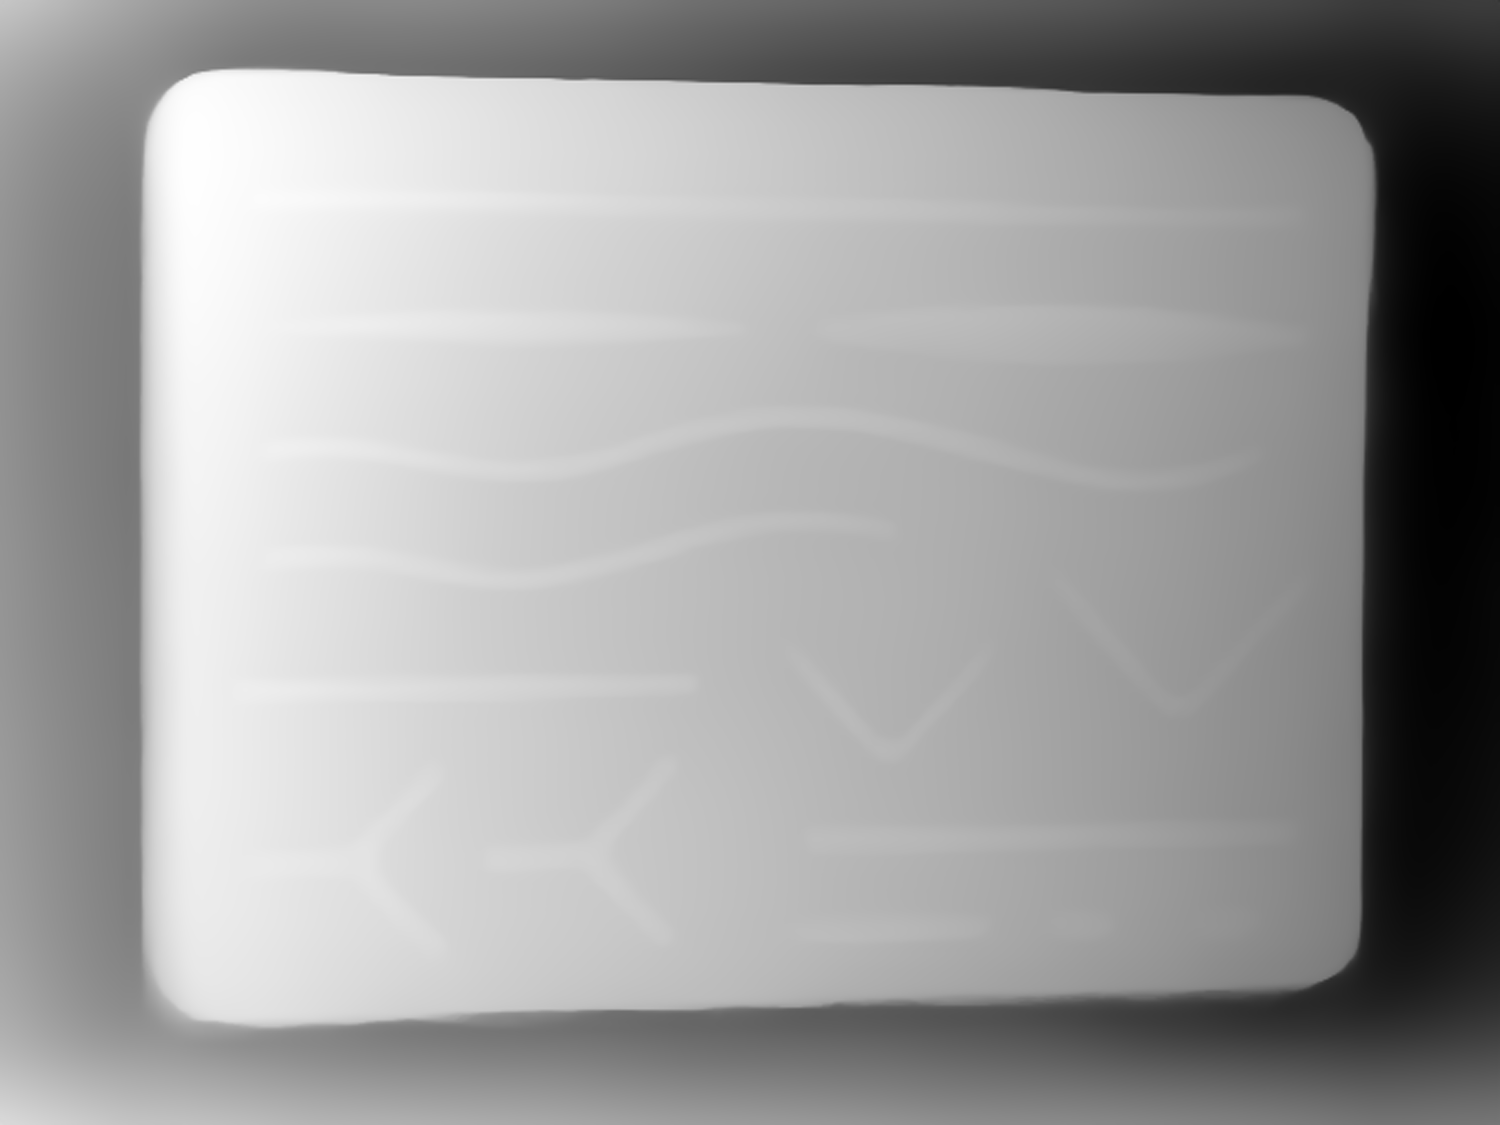

In [24]:
# Perform Relative Depth Estimation
relative_predictions = relative_depth_pipe(sharpened_img)
relative_depth_map = relative_predictions["depth"]  # Get depth visualization
relative_depth_map

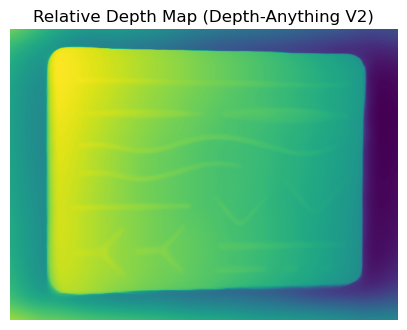

In [25]:
# Display relative depth map
plt.figure(figsize=(5, 5))
plt.imshow(relative_depth_map, cmap="viridis")
plt.axis("off")
plt.title("Relative Depth Map (Depth-Anything V2)")
plt.show()


In [26]:
import time
from transformers import AutoImageProcessor, AutoModelForDepthEstimation

absolute_checkpoint = "Intel/zoedepth-nyu-kitti"

# Retry logic
retries = 3
for attempt in range(retries):
    try:
        image_processor = AutoImageProcessor.from_pretrained(absolute_checkpoint)
        model = AutoModelForDepthEstimation.from_pretrained(absolute_checkpoint).to(device)
        break  # If successful, exit loop
    except Exception as e:
        print(f"Error on attempt {attempt+1}: {e}")
        if attempt < retries - 1:
            time.sleep(5)  # Wait before retrying
        else:
            raise  # Raise the exception after all retries fail


In [27]:
# Preprocess sharpened image for ZoeDepth model
pixel_values = image_processor(sharpened_img, return_tensors="pt").pixel_values.to(device)

In [28]:
# Perform Absolute Depth Estimation
with torch.no_grad():
    outputs = model(pixel_values)
    post_processed_output = image_processor.post_process_depth_estimation(
        outputs,
        source_sizes=[(sharpened_img.height, sharpened_img.width)]
    )
    predicted_depth = post_processed_output[0]["predicted_depth"]

In [29]:
# Normalize and display the absolute depth map
depth_normalized = (predicted_depth - predicted_depth.min()) / (predicted_depth.max() - predicted_depth.min())
depth_normalized = (depth_normalized * 255).detach().cpu().numpy().astype("uint8")
absolute_depth_map = Image.fromarray(depth_normalized)

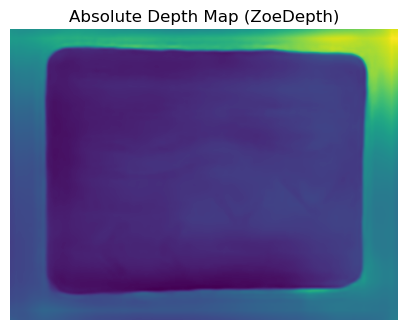

In [30]:
# Display absolute depth map
plt.figure(figsize=(5, 5))
plt.imshow(absolute_depth_map, cmap="viridis")
plt.axis("off")
plt.title("Absolute Depth Map (ZoeDepth)")
plt.show()

In [31]:
import numpy as np
import matplotlib.pyplot as plt

In [32]:
# Assume we have both relative and absolute depth maps (as numpy arrays)
relative_depth_map = np.array(relative_depth_map)  # Relative depth map
absolute_depth_map = np.array(absolute_depth_map)

In [33]:
# Function to check for missing or invalid values in a depth map
def check_depth_map_validity(depth_map, map_name="Depth Map"):
    # Check for NaN values
    nan_count = np.isnan(depth_map).sum()
    # Check for infinite values
    inf_count = np.isinf(depth_map).sum()
    # Check for zero values
    zero_count = np.sum(depth_map == 0)

    print(f"{map_name} Analysis:")
    print(f"- NaN values: {nan_count}")
    print(f"- Infinite values: {inf_count}")
    print(f"- Zero values: {zero_count}")
    print(f"- Total values: {depth_map.size}")
    print("-" * 30)

# Assume we have both depth maps as numpy arrays
# relative_depth_map and absolute_depth_map
check_depth_map_validity(relative_depth_map, "Relative Depth Map")
check_depth_map_validity(absolute_depth_map, "Absolute Depth Map")


Relative Depth Map Analysis:
- NaN values: 0
- Infinite values: 0
- Zero values: 4595
- Total values: 1687500
------------------------------
Absolute Depth Map Analysis:
- NaN values: 0
- Infinite values: 0
- Zero values: 575
- Total values: 1687500
------------------------------


In [34]:
# Zero Masking: Replace zero values in the absolute depth map with corresponding values from the relative depth map
combined_depth_map = np.where(absolute_depth_map == 0, relative_depth_map, absolute_depth_map)

In [35]:
# Normalize the combined depth map for visualization
combined_depth_map_normalized = (combined_depth_map - combined_depth_map.min()) / (combined_depth_map.max() - combined_depth_map.min())
combined_depth_map_normalized = (combined_depth_map_normalized * 255).astype("uint8")

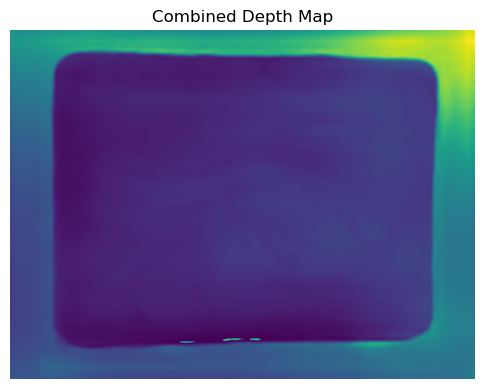

In [36]:
# Display the combined depth map
plt.figure(figsize=(6, 6))
plt.imshow(combined_depth_map_normalized, cmap="viridis")
plt.axis("off")
plt.title("Combined Depth Map")
plt.show()

In [37]:
# Optionally, convert the combined depth map back to a PyTorch tensor if further processing is needed
combined_depth_map_tensor = torch.from_numpy(combined_depth_map).float()

In [42]:
import numpy as np
import torch
import matplotlib.pyplot as plt
from PIL import Image

# Post-Processing: Apply contrast adjustment to the combined depth map
def enhance_contrast(image, factor=1.5):
    """
    Adjusts the contrast of a depth map for better visualization.
    Factor > 1 increases contrast, factor < 1 decreases it.
    """
    mean = image.mean()
    return np.clip(mean + factor * (image - mean), 0, 255).astype("uint8")

In [44]:
# Adjust the contrast of the combined depth map
enhanced_depth_map = enhance_contrast(combined_depth_map_normalized, factor=1.8)

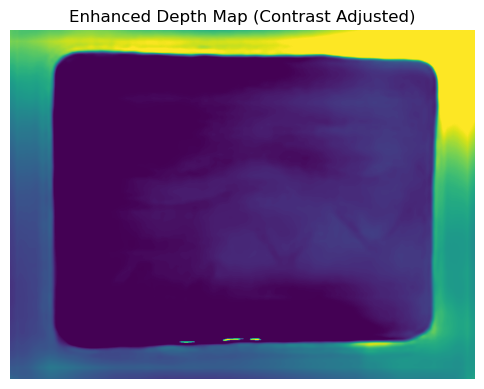

In [46]:
# Display the enhanced depth map
plt.figure(figsize=(6, 6))
plt.imshow(enhanced_depth_map, cmap="viridis")
plt.axis("off")
plt.title("Enhanced Depth Map (Contrast Adjusted)")
plt.show()

In [67]:
# Save the enhanced depth map as an image file
enhanced_depth_image_path = "C:/Users/dell/Desktop/enhanced_depth_map.png"  # Change this path if needed
enhanced_depth_map_image = Image.fromarray(enhanced_depth_map)
enhanced_depth_map_image.save(enhanced_depth_image_path)

print(f"Enhanced depth map saved to: {enhanced_depth_image_path}")


Enhanced depth map saved to: C:/Users/dell/Desktop/enhanced_depth_map.png


In [38]:
!pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable


In [50]:
import argparse
import sys
import os
import numpy as np
from PIL import Image

In [52]:
# Intrinsic camera parameters
focalLength = 525.0
centerX = 319.5
centerY = 239.5
scalingFactor = 1000.0

In [73]:
from PIL import Image
import numpy as np

# Modify this path to where your RGB image is located
rgb_file = "C:/Users/dell/Downloads/image/sp2.jpg"  # Example path for the RGB image
# Path to the enhanced depth map you just saved
depth_file = "C:/Users/dell/Desktop/enhanced_depth_map.png"  # Path to the enhanced depth map

ply_file = "C:/Users/dell/Desktop/output_pointcloud.ply"  # Path to save .ply on Desktop

# Camera intrinsic parameters (modify as necessary)
focalLength = 525.0
centerX = 319.5
centerY = 239.5
scalingFactor = 1000.0  # For depth scaling, adjust if needed

# Method to generate the point cloud
def generate_pointcloud_method1(rgb_file, depth_file, ply_file):
    rgb = Image.open(rgb_file)
    depth = Image.open(depth_file)

    # Convert depth image to grayscale if it's not already
    if depth.mode != "L":  # "L" is for grayscale
        depth = depth.convert("L")
    
    # Ensure images are compatible
    if rgb.size != depth.size:
        raise ValueError("Color and depth image do not have the same resolution.")
    if rgb.mode != "RGB":
        raise ValueError("Color image is not in RGB format")

    points = []
    for v in range(rgb.size[1]):
        for u in range(rgb.size[0]):
            color = rgb.getpixel((u, v))
            Z = depth.getpixel((u, v)) / scalingFactor  # Convert depth to meters
            if Z == 0:  # Skip invalid depth points
                continue
            X = (u - centerX) * Z / focalLength
            Y = (v - centerY) * Z / focalLength
            points.append(f"{X} {Y} {Z} {color[0]} {color[1]} {color[2]} 0\n")
    
    with open(ply_file, "w") as file:
        file.write(f'''ply
format ascii 1.0
element vertex {len(points)}
property float x
property float y
property float z
property uchar red
property uchar green
property uchar blue
property uchar alpha
end_header
{''.join(points)}
''')
    print(f"Point cloud saved to {ply_file}")

# Generate the point cloud
generate_pointcloud_method1(rgb_file, depth_file, ply_file)


Point cloud saved to C:/Users/dell/Desktop/output_pointcloud.ply
